In [1]:
import pandas as pd
data = pd.read_excel('PM10_with_AR_sample.xlsx')
data.head()

,Unnamed: 0,roz_aval,roz_dovom,roz_sevom,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,roz_pihbini,TT
0,0,133.916667,147.833333,157.958333,16.6,91.250,2.875,0.9397,-0.342020,1008.66,22.0,48.708333,38.291667
1,1,147.833333,157.958333,48.708333,18.9,70.125,1.875,-0.5000,0.866025,1007.70,1.0,47.541667,23.681818
2,2,157.958333,48.708333,47.541667,20.0,60.750,1.125,-0.8660,0.500000,1012.65,0.0,95.166667,42.916667
3,3,48.708333,47.541667,95.166667,20.8,52.875,1.000,-0.3420,0.939693,1014.34,0.0,76.208333,35.750000
4,4,47.541667,95.166667,76.208333,21.3,47.500,1.125,-0.5000,-0.866025,1013.30,0.0,87.833333,36.666667


In [65]:
X = data[['roz_aval','roz_dovom','roz_sevom','TT','Humid','Wind Direction Sin','Wind Direction COS','Pressure','RainFall']]
X = X.values
Y = data['roz_pihbini']
Y = Y.values
from sklearn.preprocessing import StandardScaler
sc_X3 = StandardScaler()
sc_y3 = StandardScaler()
X3_3 = sc_X3.fit_transform(X)
Y = Y.reshape(-1,1)
Y3_3 = sc_y3.fit_transform(Y)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=8)
X_sklearn = sklearn_pca.fit_transform(X3_3)




In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.2)

In [131]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=9))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=2000,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 0s/step - loss: 8602.8232


8602.8232421875

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 4704.655
rmse : 68.590
mae : 35.569


(10, 200)

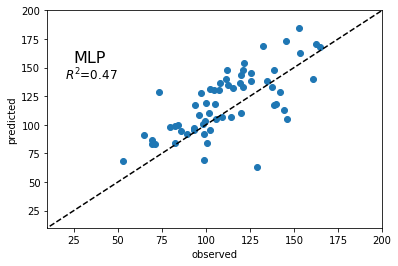

In [107]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLP',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])

In [108]:
model_json1 = model.to_json()
with open("MLP_PM10_with_Autocorelation_2.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_PM10_with_Autocorelation_2.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=55, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 5240.154
rmse : 72.389
mae : 34.333


D:\phyton\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(10, 200)

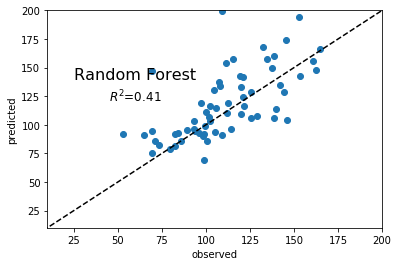

In [95]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,140,'Random Forest',fontsize=16)
plt.text(45,120, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
sklinreg = LinearRegression()
sklinreg.fit(x_train, y_train)
y_ord_pred = sklinreg.predict(x_test)
mse33 = mean_squared_error(y_test, y_ord_pred)
mae33 = mean_absolute_error(y_test, y_ord_pred)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 7171.258
rmse : 84.683
mae : 46.741


(10, 200)

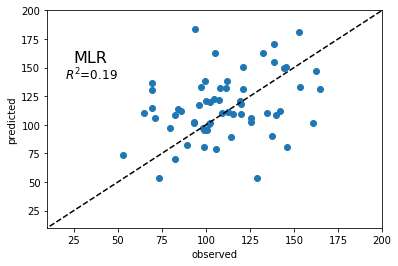

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_ord_pred)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLR',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_ord_pred)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])

In [194]:
r = data['roz_pihbini']
max(r)

510.0